# KNN digit recognizer

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## view data

(2, 785)


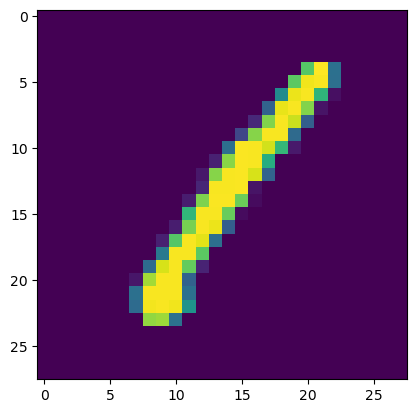

In [20]:
train_data = pd.read_csv(f'{data_dir}/train.csv/train.csv', nrows=2)
print(train_data.shape)

img = train_data.values[0,1:].reshape((28, 28))
plt.imshow(img)
plt.show()

## Split training data into train_set and validation_set

In [62]:
data_dir = './data/knn'
sample_rows = 5000

def load_data(data_dir):
    data = pd.read_csv(f'{data_dir}/train.csv/train.csv', nrows=sample_rows)
    training_data = data.values[:,1:]    
    training_label_data = data.values[:, 0]
    test_data = pd.read_csv(f'{data_dir}/test.csv/test.csv').values
    return training_data, training_label_data, test_data

training_data, training_label_data, test_data = load_data(data_dir)
X_train, X_vali, label_train, label_vali = train_test_split(training_data, training_label_data, test_size=0.2, random_state=0)

print(X_train.shape, X_vali.shape, label_train.shape, label_vali.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


## Train model

In [63]:
scores = []
k_upper = 10
k_range = range(1, k_upper)
for k in k_range:
    # print(f'training with k={k}')
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_data, training_label_data)
    vali_predict = knn.predict(X_vali)

    accurracy_rate = accuracy_score(label_vali, vali_predict)
    scores.append(accurracy_rate)

    cf_report = classification_report(label_vali, vali_predict)
    cf_metrix = confusion_matrix(label_vali, vali_predict)

    end = time.time()
    print(f'training with k={k}. it takes {end-start}')
    # if k == 1:
    #      print(cf_report)
    #      print(cf_metrix)
    
print(scores)    

training with k=1. it takes 0.1755967140197754
training with k=2. it takes 0.20609402656555176
training with k=3. it takes 0.22416424751281738
training with k=4. it takes 0.24788856506347656
training with k=5. it takes 0.2314441204071045
training with k=6. it takes 0.2461559772491455
training with k=7. it takes 0.24051785469055176
training with k=8. it takes 0.25206899642944336
training with k=9. it takes 0.22803449630737305
[1.0, 0.959, 0.963, 0.951, 0.948, 0.94, 0.938, 0.938, 0.93]


### Print accuracy chart

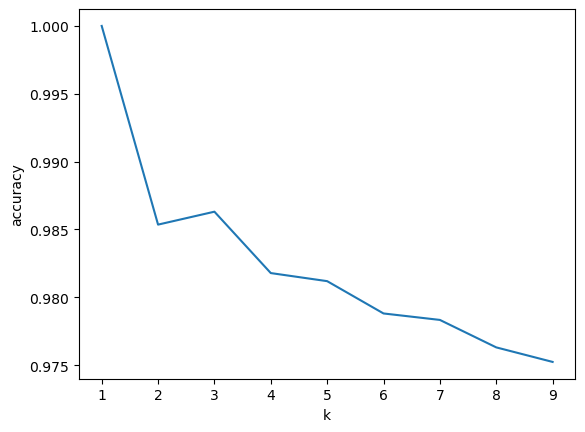

In [56]:
plt.plot(k_range, scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

### Predict using testing data set

In [64]:
k_test = 3
knn_test = KNeighborsClassifier(k_test)
knn_test.fit(training_data, training_label_data)
test_predict = knn_test.predict(test_data)

3


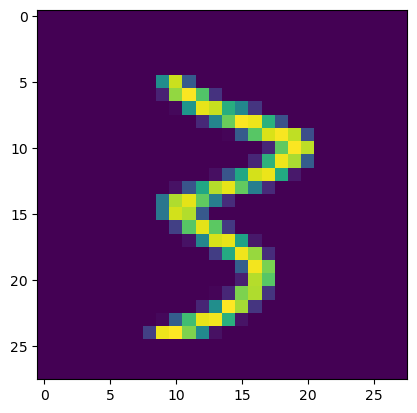

In [67]:
index = 105
print(test_predict[index])
plt.imshow(test_data[index].reshape((28, 28)))
plt.show()

## Print prediction result

In [68]:
r_data ={'ImageId': list(range(1, len(test_predict)+ 1)), "Label": test_predict}
pd.DataFrame(r_data).to_csv('./data/knn/Digit_Recogniser_Result.csv', index=False,header=True)